2018-12-27 16:00:29 
2019-04-28 20:27:46 
2019-05-21 09:49:44 

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
from IPython.display import HTML

In [5]:
# Disable warning message
import warnings
warnings.filterwarnings('ignore')

In [6]:
import numpy as np
import pandas as pd

In [7]:
import math
import random

In [8]:
from scipy import stats, integrate
from scipy.integrate import quad
from scipy.special import factorial

In [9]:
dir(stats);

In [10]:
statsDF = pd.DataFrame(dir(stats))
statsDF.columns
statsDF.info()

RangeIndex(start=0, stop=1, step=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 1 columns):
0    248 non-null object
dtypes: object(1)
memory usage: 2.0+ KB


In [11]:
statsDF[0][23]

'anderson_ksamp'

In [12]:
dir(stats.distributions);

In [13]:
type(dir(stats.distributions))

list

In [14]:
type(stats.distributions)

module

In [15]:
#?stats.describe

In [16]:
stats.describe([1,2,4,6])

DescribeResult(nobs=4, minmax=(1, 6), mean=3.25, variance=4.916666666666667, skewness=0.27803055565396284, kurtosis=-1.4266015512783683)

In [17]:
pd.DataFrame(dir(stats.distributions));

# Compare examples with the source code

## How to inspect the construction  of code as a user

In [18]:
from scipy.stats import poisson
type(poisson)

scipy.stats._discrete_distns.poisson_gen

# Frequent distributions

## Uniform distribution

In [19]:
# random numbers from uniform distribution
n = 100000
start = 10
width = 20
data_uniform = stats.uniform.rvs(size=n, loc = start, scale=width)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Uniform Distribution ')]

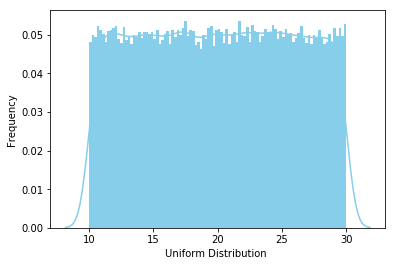

In [20]:
ax = sns.distplot(data_uniform,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')

## The Gauss Distribution

<span style="font-family: New York Times; font-size:1em; color:green;">
https://www.mathsisfun.com/data/standard-normal-distribution.html

<span style="font-family: Cosmic Sans MS; font-size:2em; color: #808000">
$$f(x;\mu,\sigma)=\frac{1}{\sqrt{2\pi}\sigma}e^{\frac{-(x-\mu)^2}{2\sigma^2}}$$
</span>

The scipy.stats.norm usage https://blog.csdn.net/claroja/article/details/72830515

Text(0.5, 1.0, 'Analytical vs. Estimated PDF')

Text(0, 0.5, 'Probability')

Text(-2.0, 0.35, '$f(x) = \\frac{\\exp(-x^2/2)}{\\sqrt{2*\\pi}}$')

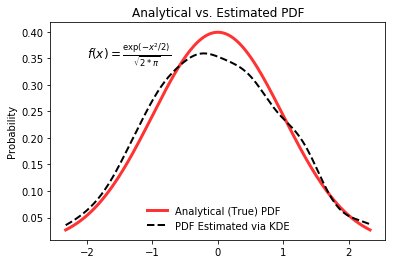

In [21]:
# An object representing the "frozen" analytical distribution
# Defaults to the standard normal distribution, N~(0, 1)
dist = stats.norm()

# Draw random samples from the population you built above.
# This is just a sample, so the mean and std. deviation should
# be close to (1, 0).
samp = dist.rvs(size=1000)

# `ppf()`: percent point function (inverse of cdf — percentiles).
x = np.linspace(start=stats.norm.ppf(0.01),
                stop=stats.norm.ppf(0.99), num=250)
gkde = stats.gaussian_kde(dataset=samp)

# `gkde.evaluate()` estimates the PDF itself.
fig, ax = plt.subplots()
ax.plot(x, dist.pdf(x), linestyle='solid', c='red', lw=3,
        alpha=0.8, label='Analytical (True) PDF')
ax.plot(x, gkde.evaluate(x), linestyle='dashed', c='black', lw=2,
        label='PDF Estimated via KDE')
ax.legend(loc='best', frameon=False)
ax.set_title('Analytical vs. Estimated PDF')
ax.set_ylabel('Probability')
ax.text(-2., 0.35, r'$f(x) = \frac{\exp(-x^2/2)}{\sqrt{2*\pi}}$',
        fontsize=12)

Text(0.5, 0, 'x')

Text(0, 0.5, 'pdf $f(x;\\mu,\\sigma)$ ')

(0, 0.5)

(0, 20)

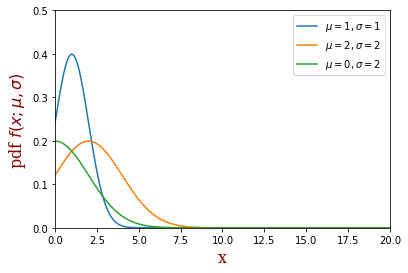

In [22]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

x = np.linspace (0, 100, 11000) 
y1 = stats.norm.pdf(x, loc=1, scale=1) # loc代表了均值,scale代表标准差
y2 = stats.norm.pdf(x, loc=2, scale=2)
y3 = stats.norm.pdf(x, loc=0, scale=2)

plt.plot(x, y1, label=(r'$\mu=1, \sigma= 1$')) 
plt.plot(x, y2, label=(r'$\mu=2, \sigma= 2$')) 
plt.plot(x, y3, label=(r'$\mu=0, \sigma= 2$'))

plt.xlabel("x",fontdict = font)
plt.ylabel("pdf $f(x;\mu,\sigma)$ ",fontdict = font)
plt.legend()

plt.ylim([0,0.5])
plt.xlim([0,20])
plt.show()

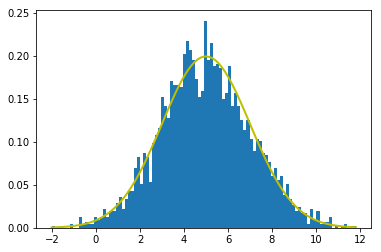

In [23]:
class norm1:
    def __init__(self, mean, sd, x):
        self.mean = mean
        self.sd = sd
        self.x = x
        
    def dist_curve(self):
        plt.plot(self.x, 1/(self.sd * np.sqrt(2 * np.pi)) *
            np.exp( - (self.x - self.mean)**2 / (2 * self.sd**2) ), linewidth=2, color='y')
        plt.show()

#Vary the mean and SD to generate different plots
mean1 = 5 
sd1 = 2
c = np.random.normal(mean1, sd1, 3000) 
w1, x1, z1 = plt.hist(c, 100, normed=True) #hist
hist1 = norm1(mean1, sd1, x1)
plot1 = hist1.dist_curve()

In [24]:
def f(x):
    return 1/ math.sqrt(2* math.pi)* math.exp(- math.pow(x, 2)/2)

In [25]:
f = lambda x: 1/ math.sqrt(2* math.pi)* math.exp(- math.pow(x, 2)/2)

In [26]:
[f(i) for i in range(2)] 

[0.3989422804014327, 0.24197072451914337]

In [27]:
[f(i) for i in [1, 2]]

[0.24197072451914337, 0.05399096651318806]

In [28]:
def evenlyDistributedPoints(lower_limit, upper_limit, num):
    z = []
    interval = (upper_limit - lower_limit)/num
    for i in range(0, num+1):
        a = lower_limit + interval*i  
        z.append(a)
    return z

In [29]:
evenlyDistributedPoints(1, 2, 10)

[1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7000000000000002, 1.8, 1.9, 2.0]

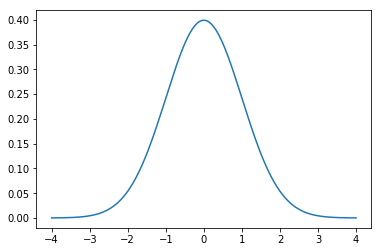

In [30]:
x  =  evenlyDistributedPoints(-4, 4, 400)
y = [f(i) for i in x]
plt.plot(x, y)
plt.show()

In [31]:
x = np.linspace(1, 2, 11)
x 

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

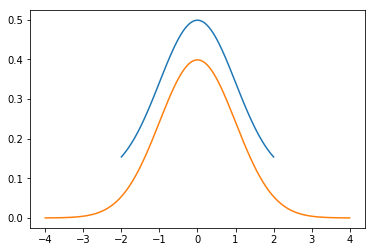

In [32]:
def f(x):
    return 1/ np.sqrt(2* np.pi)* np.exp(- np.power(x, 2)/2)
x1 = np.linspace(-2,2,100)
x2 = np.linspace(-4,4,400)
plt.plot(x1, f(x1)+0.1)
plt.plot(x2, f(x2)) 
plt.show() 

### Demo of the histogram (hist) function with a few features

Text(0.5, 0, 'Smarts')

Text(0, 0.5, 'Probability density')

Text(0.5, 1.0, 'Histogram of IQ: $\\mu=100$, $\\sigma=15$')

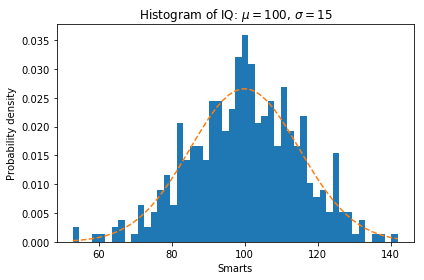

In [33]:
np.random.seed(19680801)
# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50
fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)
# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

Normal Distribution (mean,std): 8.0 3.0
Integration bewteen 11.0 and 14.0 -->  0.13590512198327787


(0.0, 16.0)

(0, 0.25)

Text(0.5, 1.0, 'How to integrate a normal distribution in python ?')

Text(0.5, 0, 'x')

Text(0, 0.5, 'Normal Distribution')

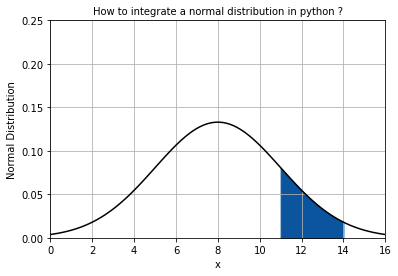

In [34]:
from scipy.integrate import quad
import scipy.stats

#----------------------------------------------------------------------------------------#
# Normal Distribution

x_min = 0.0
x_max = 16.0

mean = 8.0 
std = 3.0

x = np.linspace(x_min, x_max, 100)
y = scipy.stats.norm.pdf(x,mean,std)
plt.plot(x,y, color='black')

#----------------------------------------------------------------------------------------#
# integration between x1 and x1

def normal_distribution_function(x):
    value = scipy.stats.norm.pdf(x,mean,std)
    return value

x1 = mean + std
x2 = mean + 2.0 * std
res, err = quad(normal_distribution_function, x1, x2)

print('Normal Distribution (mean,std):',mean,std)
print('Integration bewteen {} and {} --> '.format(x1,x2),res)

#----------------------------------------------------------------------------------------#
# plot integration surface

ptx = np.linspace(x1, x2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)
plt.fill_between(ptx, pty, color='#0b559f', alpha='1.0')

#----------------------------------------------------------------------------------------#

plt.grid()

plt.xlim(x_min,x_max)
plt.ylim(0,0.25)
plt.title('How to integrate a normal distribution in python ?',fontsize=10)
plt.xlabel('x')
plt.ylabel('Normal Distribution')
plt.savefig("integrate_normal_distribution.png")
plt.show()

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

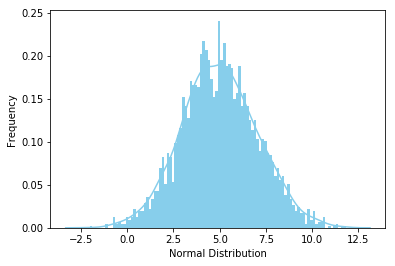

In [35]:
ax = sns.distplot(c,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

In [36]:
# generate random numbers from N(0,1)
data_normal = stats.norm.rvs(size=10000,loc=2,scale=1)# 一个连续的正态分布,loc代表了均值,scale代表标准差

In [37]:
stats.norm.name
stats.norm.pdf(3)

'norm'

0.0044318484119380075

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

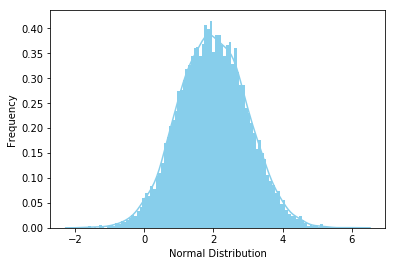

In [38]:
ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

In [39]:
normal_expression = stats.norm.pdf(0, loc = 0, scale =1)
normal_expression

0.3989422804014327

<span style="font-family: Cosmic Sans MS; font-size:2em; color: #808000">
$$f(x, y;\mu_1, \mu_2,\sigma_1, \sigma_2)=\frac{1}{2\pi\sigma_1\sigma_2}e^{\frac{-(x-\mu_1)^2}{2\sigma_1^2}+\frac{-(y-\mu_2)^2}{2\sigma_2^2}}$$
</span>




## The Boltzman distribution
<span style="font-family: Cosmic Sans MS; font-size:2em">

   
</span>

## The possion Distribution

<span style="font-family: Cosmic Sans MS; font-size:2em; color: #808000">
$$f(n;\nu)=\frac{\nu^n}{n!}e^{-\nu}$$
</span>

In [40]:
np.math.factorial

<function math.factorial(x, /)>

In [41]:
math.exp(2)
np.math.factorial(0)
np.exp(2)
np.exp2(2)

7.38905609893065

1

7.38905609893065

4.0

In [42]:
def PossionDistribution(m,n):
    formulaExpression = np.power(m,n)/np.math.factorial(n) * np.exp(-m)
    return formulaExpression

In [43]:
PossionDistribution(1,1)

0.36787944117144233

In [44]:
f = lambda m, n:  np.power(m,n)/np.math.factorial(n) * np.exp(-m)

In [45]:
f(1, 1)

0.36787944117144233

In [46]:
[f(0.5, i) for i in range(6)]

[0.6065306597126334,
 0.3032653298563167,
 0.07581633246407918,
 0.012636055410679862,
 0.0015795069263349827,
 0.0001579506926334983]

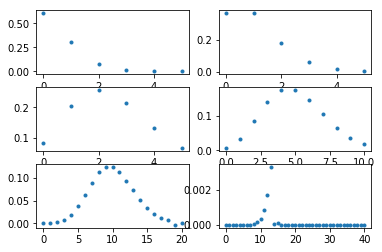

In [47]:
x = range(6)
y = [f(0.5, i) for i in x]
plt.subplot(321)
plt.plot(x, y, '.')
#plt.show()

y = [f(1, i) for i in x]
plt.subplot(322)
plt.plot(x, y, '.')

y = [f(2.5, i) for i in x]
plt.subplot(323)
plt.plot(x, y, '.')


x = range(11)
y = [f(5, i) for i in x]
plt.subplot(324)
plt.plot(x, y, '.')

plt.subplot(325)
x = range(21)
y = [f(10, i) for i in x]
plt.plot(x, y, '.')

plt.subplot(326)
x = range(41)
y = [f(25, i) for i in x]
plt.plot(x, y, '.')
plt.show()

<span style="font-family: New York Times; font-size:1.5em; color: red">

$m$ and $n$ are discrete numbers, how to place this condition in the expression?

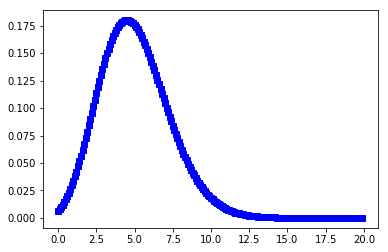

In [48]:
t = np.arange(0, 20, 0.1)
d = np.exp(-5)*np.power(5, t)/factorial(t)
plt.plot(t, d, 'bs')
plt.show()

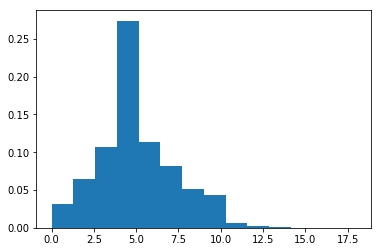

In [49]:
s = np.random.poisson(5, 10000)
count, bins, ignored = plt.hist(s, 14, density=True)
plt.show()

(-0.5, 30)

(0, 0.4)

Text(0.5, 0, '$x$')

Text(0, 0.5, '$p(x|\\mu)$')

Text(0.5, 1.0, 'Poisson Distribution')

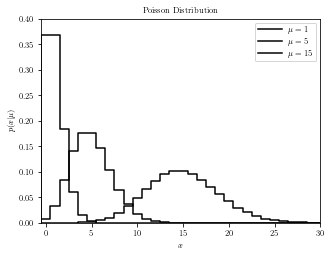

In [50]:
from scipy.stats import poisson
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)
# Define the distribution parameters to be plotted
mu_values = [1, 5, 15]
linestyles = ['-', '--', ':']

#------------------------------------------------------------
# plot the distributions
#   we generate it using scipy.stats.poisson().  Once the distribution
#   object is created, we have many options: for example
#   - dist.pmf(x) evaluates the probability mass function in the case of
#     discrete distributions.
#   - dist.pdf(x) evaluates the probability density function for
#   evaluates
fig, ax = plt.subplots(figsize=(5, 3.75))

for mu, ls in zip(mu_values, linestyles):
    # create a poisson distribution
    # we could generate a random sample from this distribution using, e.g.
    #   rand = dist.rvs(1000)
    dist = poisson(mu)
    x = np.arange(-1, 200)

    plt.plot(x, dist.pmf(x), ls=ls, color='black',
             label=r'$\mu=%i$' % mu, linestyle='steps-mid')

plt.xlim(-0.5, 30)
plt.ylim(0, 0.4)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu)$')
plt.title('Poisson Distribution')

plt.legend()
plt.show()


## The Binomal Distribution

<span style="font-family: Cosmic Sans MS; font-size:2em; color: #808000"> 
$$f(r;N,p)=\frac{N!}{r!(N-r)!}p^{r}(1-p)^{n-r}$$

## The Caucy, or Breit-weigner, or Lorentizian Distribution
<span style="font-family: Cosmic Sans MS; font-size:2em">

<span style="font-family: Cosmic Sans MS; font-size:2em; color: #808000">   
$$f(E;M,\Gamma)=\frac{1}{2\pi}\frac{\Gamma}{(E-M)^2+(\Gamma/2)^2}$$

## The Landau Distribution


<span style="font-family: Cosmic Sans MS; font-size:2em; color: #808000">
$$f(\lambda)=\frac{1}{\pi}\int_{0}^{\infty}e^{-u\ln u -\lambda u} \sin(\pi u) du$$
</span>

In [51]:
invexp = lambda x: np.exp(-x)
integrate.quad(invexp, 0, np.inf) 

(1.0000000000000002, 5.842606742906004e-11)

In [52]:
np.log(np.e)

1.0

In [53]:
f = lambda l, u: np.exp(-u * np.log(u) - l*u)*np.sin(np.pi *u)

## The Negative Binomial Distribution

<span style="font-family: Cosmic Sans MS; font-size:2em; color: #808000">
$$f(r; k, p)=\frac{(k+r-1)!}{r!(k-1)!}q^kp^r$$

## Gamma Distribution

## Characterization using shape α and rate β

A random variable X that is gamma-distributed with shape α and rate β is denoted 
$X \sim \Gamma ( \alpha , \beta ) \equiv \operatorname { Gamma } ( \alpha , \beta )$

The corresponding probability density function in the shape-rate parametrization is    
$$
f ( x ; \alpha , \beta ) = \frac { \beta ^ { \alpha } x ^ { \alpha - 1 } e ^ { - \beta x } } { \Gamma ( \alpha ) } \quad \text { for } x > 0 \text { and } \alpha , \beta > 0
$$

## Characterization using shape k and scale θ

A random variable X that is gamma-distributed with shape α and rate β is denoted 
$X \sim \Gamma ( k , \theta ) \equiv \operatorname { Gamma } ( k , \theta )$

The corresponding probability density function in the shape-rate parametrization is    
$$
f ( x ; k , \theta ) = \frac { x ^ { k - 1 } e ^ { - \frac { x } { \theta } } } { \theta ^ { k } \Gamma ( k ) } \quad \text { for } x > 0 \text { and } k , \theta > 0
$$


<img src="https://upload.wikimedia.org/wikipedia/commons/e/e6/Gamma_distribution_pdf.svg" style="width: 50%; height: 50%"/>

In [54]:
np.math.gamma(2)

1.0

In [55]:
f = lambda x, k, m: np.power(x, k-1)*np.exp(-x/m)/(np.power(m, k)*np.math.gamma(k)) 

(0, 0.5)

(0, 0.5)

(0, 0.5)

(0, 0.5)

(0, 0.5)

(0, 0.5)

(0, 0.5)

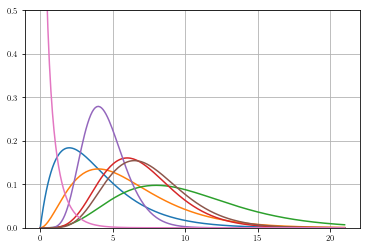

In [56]:
x = np.linspace(0, 21, 200)
klist = [2, 3, 5, 7, 9, 7.5, 0.5]
mlist = [2, 2, 2, 1, 0.5, 1, 1]

for i in range(7): 
    y = [f(j, klist[i], mlist[i]) for j in x] 
    plt.plot(x, y)
    plt.ylim(0, 0.5) 
    
plt.grid() 
plt.show() 

Text(0.5, 0, 'x')

Text(0, 0.5, 'pdf f(x)')

(0, 0.5)

(0, 20)

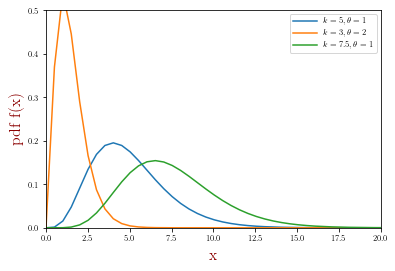

In [57]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

x = np.linspace (0, 100, 200) 
y1 = stats.gamma.pdf(x, a=5, scale=1) # a = k, scale = 1/ theta
y2 = stats.gamma.pdf(x, a=3, scale=0.5)
y3 = stats.gamma.pdf(x, a=7.5, scale=1)

plt.plot(x, y1, label=(r'$k=5, \theta=1$')) 
plt.plot(x, y2, label=(r'$k=3, \theta=2$')) 
plt.plot(x, y3, label=(r'$k=7.5, \theta=1$'))

plt.xlabel("x",fontdict = font)
plt.ylabel("pdf f(x)",fontdict = font)
plt.legend()

plt.ylim([0,0.5])
plt.xlim([0,20])
plt.show()